# aii) Gender Classification

In [3]:
import pandas as pd
import requests
import io
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

test_url = "https://raw.githubusercontent.com/InduVarshini/ML-HW5-Identify-Depression-and-Gender-From-Audio-Features/indu/Datasets/ADS/final_testing_data.csv" # Make sure the url is the raw version of the file on GitHub
testdownload = requests.get(test_url).content
test_df = pd.read_csv(io.StringIO(testdownload.decode('utf-8')))

train_url = "https://raw.githubusercontent.com/InduVarshini/ML-HW5-Identify-Depression-and-Gender-From-Audio-Features/indu/Datasets/ADS/final_training_data.csv" # Make sure the url is the raw version of the file on GitHub
traindownload = requests.get(train_url).content
df = pd.read_csv(io.StringIO(traindownload.decode('utf-8')))

df.head()

,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,participant_id,Depression,Gender
0,0,33.883310,0.188470,31.197649,31.198807,31.237043,0.039394,39.990345,28.040092,100.798780,...,1.960784,2.061856,0.240000,0.010000,0.225,0.005000,-53.529380,448,1,1
1,1,23.442284,0.015231,23.083265,23.519197,23.799660,0.716394,0.000000,0.000000,-0.109734,...,3.703704,2.040816,0.080000,0.000000,0.380,0.000000,-47.326970,448,1,1
2,2,26.658195,0.095594,24.275490,27.404346,29.017082,4.741592,61.829530,67.673560,20.461290,...,3.131991,2.036199,0.344444,0.235472,0.115,0.087321,-41.121784,448,1,1
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.333334,0.000000,0.000000,0.000000,0.240,0.000000,-56.265000,448,1,1
4,4,34.614662,0.005980,34.433628,34.559757,34.764160,0.330532,8.279264,5.828207,8.208370,...,5.084746,1.886793,0.420000,0.000000,0.040,0.020000,-33.531155,448,1,1


In [4]:
df.head()

,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,participant_id,Depression,Gender
0,0,33.883310,0.188470,31.197649,31.198807,31.237043,0.039394,39.990345,28.040092,100.798780,...,1.960784,2.061856,0.240000,0.010000,0.225,0.005000,-53.529380,448,1,1
1,1,23.442284,0.015231,23.083265,23.519197,23.799660,0.716394,0.000000,0.000000,-0.109734,...,3.703704,2.040816,0.080000,0.000000,0.380,0.000000,-47.326970,448,1,1
2,2,26.658195,0.095594,24.275490,27.404346,29.017082,4.741592,61.829530,67.673560,20.461290,...,3.131991,2.036199,0.344444,0.235472,0.115,0.087321,-41.121784,448,1,1
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.333334,0.000000,0.000000,0.000000,0.240,0.000000,-56.265000,448,1,1
4,4,34.614662,0.005980,34.433628,34.559757,34.764160,0.330532,8.279264,5.828207,8.208370,...,5.084746,1.886793,0.420000,0.000000,0.040,0.020000,-33.531155,448,1,1


In [5]:
# print null count
print(df.isnull().sum())

# Print row with null values
print(df[df.isnull().any(axis=1)])

Unnamed: 0                                    0
F0semitoneFrom27.5Hz_sma3nz_amean             1
F0semitoneFrom27.5Hz_sma3nz_stddevNorm        1
F0semitoneFrom27.5Hz_sma3nz_percentile20.0    1
F0semitoneFrom27.5Hz_sma3nz_percentile50.0    1
                                             ..
StddevUnvoicedSegmentLength                   1
equivalentSoundLevel_dBp                      1
participant_id                                0
Depression                                    0
Gender                                        0
Length: 92, dtype: int64
      Unnamed: 0  F0semitoneFrom27.5Hz_sma3nz_amean  \
3071        3071                                NaN   

      F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
3071                                     NaN   

      F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
3071                                         NaN   

      F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
3071                                         NaN   

      F0semitoneFrom27.5Hz_sm

# Preprocessing

In [6]:
# Drop null rows
df = df.dropna()
print(df.isna().sum().sum())

0


# Training

In [7]:
from sklearn.model_selection import train_test_split

# Drop Depression, Gender columns
X = df.drop(['Depression', 'Gender', 'participant_id'], axis=1)
y = df['Gender']

# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feed-Forward Neural Network

In [8]:
from keras import models, layers, optimizers, regularizers

def build_and_train_model(layer_sizes, activation_fn, regularization_rate, X_train, y_train, X_val, y_val):
    model = models.Sequential()
    for i, size in enumerate(layer_sizes):
        if i == 0:
            model.add(layers.Dense(size, activation=activation_fn, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(regularization_rate)))
        else:
            model.add(layers.Dense(size, activation=activation_fn, kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

    if X_val is not None and y_val is not None:
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        print('Validation Accuracy:', accuracy)

    return model

model1 = build_and_train_model([256, 64, 32], 'relu', 0.001, X_train, y_train, X_val, y_val)
model2 = build_and_train_model([256, 64, 32], 'sigmoid', 0.001, X_train, y_train, X_val, y_val)
model3 = build_and_train_model([256, 128, 64, 32], 'relu', 0.001, X_train, y_train, X_val, y_val)
model4 = build_and_train_model([512, 256, 128, 32], 'relu', 0.001, X_train, y_train, X_val, y_val)


Validation Accuracy: 0.9622018337249756


KeyboardInterrupt: 

#### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [10, 20, 30],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 20, 40],  # Maximum number of levels in tree
    'min_samples_split': [5, 10]  # Minimum number of samples required to split a node
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Setup the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1)

# Fit grid_search to the data
grid_search.fit(X_train, y_train)


# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_rf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Fitting 2 folds for each of 36 candidates, totalling 72 fits


KeyboardInterrupt: 

output (21m 22.7s):
```
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 300}
Validation Accuracy: 0.9467889908256881
```

# Choosing a ML Algorithm/Model
We will choose to use the FFNN Model 3 architecture as it achieved the best sample level validation accuracy.

In [ ]:
final_model = build_and_train_model([256, 128, 64, 32], 'relu', 0.001, X, y, None, None)

# Accuracies at the Participant Level

In [10]:
# Split data frame into multiple dataframes by participant_id and store a list of dataframes
def split_df_by_id(sdf):
    return [sdf[sdf['participant_id'] == id] for id in sdf['participant_id'].unique()]


In [11]:
def classifyParticipantGender(participant_df, model):
    # Drop Depression, Gender, participant_id
    X = participant_df.drop(['Depression','Gender', 'participant_id'], axis=1)
    y = participant_df['Gender'].to_numpy()

    # Normalize the data according to the scaler used for training
    X = scaler.transform(X)

    # Predict
    y_pred = model.predict(X, verbose=0)

    # Majority vote for the participant
    y_pred = y_pred.mean() > 0.5

    return y_pred, y

In [12]:
def getAccuraciesForParticipants(df_list, model):
    # female = 0, male = 1
    correct_female = 0
    correct_male = 0
    total_female = 0
    total_male = 0
    for df in df_list:
        pred, actual = classifyParticipantGender(df, model)
        if pred == actual:
            if actual == 0:
                correct_female += 1
            else:
                correct_male += 1
        if actual == 0:
            total_female += 1
        else:
            total_male += 1

    accuracy = (correct_female + correct_male) / (total_female + total_male)
    balanced_accuracy = 0.5 * correct_female / total_female + 0.5 * correct_male / total_male

    return accuracy, balanced_accuracy

In [13]:
acc, bal_acc = getAccuraciesForParticipants(split_df_by_id(df), final_model)
print("Training Accuracy:", acc, "Balanced Accuracy:", bal_acc)

NameError: name 'final_model' is not defined

In [ ]:
acc, bal_acc = getAccuraciesForParticipants(split_df_by_id(test_df), final_model)
print("Training Accuracy:", acc, "Balanced Accuracy:", bal_acc)

# Results

100% accuracy and 100% balanced accuracy on both the training set and the test set.

# (c) Finding the most informative features for gender

## This is currently exploring 2 feature selection methods: Decision Tree, and PCA

### First is decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
tree_feat_mod = DecisionTreeClassifier()

# Fit model
tree_feat_mod.fit(X_train, y_train)

acc_val = tree_feat_mod.score(X_val, y_val)
print("Validation accuracy for gender: ", acc_val)

Validation accuracy for gender:  0.941651376146789


In [15]:
# Finding important features
X = df.drop(['Depression', 'Gender', 'participant_id'], axis=1)
Xfeatnames = X.columns
y = df['Gender']
gen_importances = tree_feat_mod.feature_importances_

gen_import_df = pd.DataFrame(gen_importances, index=Xfeatnames, columns=["Importance"])
print(gen_import_df, end="\n\n")

                                            Importance
Unnamed: 0                                    0.050690
F0semitoneFrom27.5Hz_sma3nz_amean             0.014909
F0semitoneFrom27.5Hz_sma3nz_stddevNorm        0.001016
F0semitoneFrom27.5Hz_sma3nz_percentile20.0    0.017885
F0semitoneFrom27.5Hz_sma3nz_percentile50.0    0.694917
...                                                ...
MeanVoicedSegmentLengthSec                    0.002335
StddevVoicedSegmentLengthSec                  0.000000
MeanUnvoicedSegmentLength                     0.002991
StddevUnvoicedSegmentLength                   0.000462
equivalentSoundLevel_dBp                      0.033287

[89 rows x 1 columns]



In [16]:
# Plot importances
import matplotlib.pyplot as plt

gender_imps = pd.Series(gen_importances, index=Xfeatnames)

#gender_imps.plot.bar()


In [17]:
# Now sort the features by importance
gen_importances_df = gen_import_df.sort_values(by="Importance", ascending=False)
gender_imps = gender_imps.sort_values(ascending=False)
print(gen_importances_df, end="\n\n")

                                            Importance
F0semitoneFrom27.5Hz_sma3nz_percentile50.0    0.694917
Unnamed: 0                                    0.050690
equivalentSoundLevel_dBp                      0.033287
F0semitoneFrom27.5Hz_sma3nz_percentile20.0    0.017885
F1frequency_sma3nz_stddevNorm                 0.016126
...                                                ...
spectralFluxV_sma3nz_stddevNorm               0.000000
F2amplitudeLogRelF0_sma3nz_stddevNorm         0.000000
F2bandwidth_sma3nz_stddevNorm                 0.000000
slopeV500-1500_sma3nz_stddevNorm              0.000000
loudness_sma3_percentile80.0                  0.000000

[89 rows x 1 columns]



In [78]:
# Now to train / validate models on the most relevant features
# m = 5, 10, 15, 20, 25, 30
#print(gen_importances_df.index)
#print(gender_imps)

param_grid = {
    'n_estimators': [3, 2],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [3, 1],  # Maximum number of levels in tree
    'min_samples_split': [3, 10]  # Minimum number of samples required to split a node
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

In [84]:
# Iterate through m
count = 0

mvals = list(range(5, 35, 5))
print(mvals)

macc = []*len(mvals)
mbal_acc = []*len(mvals)

for count, m in enumerate(mvals):

  # Selected features are the first m important features
  selected_features = gen_importances_df.iloc[:m].index.tolist()
  # Create sub x and sub dataframe
  sub_X = df[selected_features]
  sub_df = df[selected_features]
  sub_val_df = test_df[selected_features]

  # Add in id. Gender and depression here for classifyParticipantGender
  #sub_X.insert(0, 'participant_id', df['participant_id'])
  # Testing data
  sub_val_df.insert(0, 'participant_id', test_df['participant_id'])
  sub_val_df.insert(0, 'Depression', test_df['Depression'])
  sub_val_df.insert(0, 'Gender', test_df['Gender'])
  sub_val_y = sub_val_df['Gender']

  # Training data
  sub_df.insert(0, 'participant_id', df['participant_id'])
  sub_df.insert(0, 'Depression', df['Depression'])
  sub_df.insert(0, 'Gender', df['Gender'])
  sub_y = sub_df['Gender']

  sub_X = scaler.fit_transform(sub_X)

  #print(len(sub_X), len(sub_df), len(sub_y))

  # Run model on features
  # Setup the grid search with 5-fold cross-validation
  mmodel = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

  # Fit grid_search to the data
  mmodel.fit(sub_X, sub_y)
  # Best parameters
  best_params = mmodel.best_params_
  print("Best parameters:", best_params)

  # Best model from grid search
  best_rf = mmodel.best_estimator_

  # Get Classification accuracies, save to array
  df_list = split_df_by_id(sub_df)
  df_val_list = split_df_by_id(sub_val_df)
  #print(df_list.head())

  # Get accuracies
  mtemp, mbal_temp = getAccsForParts(df_val_list, best_rf)
  macc.append(mtemp)
  mbal_acc.append(mbal_temp)
  print("Training Accuracy: ", macc[count], "Balanced Accuracy: ", mbal_acc[count])

[5, 10, 15, 20, 25, 30]
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 3}
Training Accuracy:  0.9378048780487804 Balanced Accuracy:  0.9378866334494093
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 2}
Training Accuracy:  0.9378048780487804 Balanced Accuracy:  0.9378866334494093
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 3}
Training Accuracy:  0.9277439024390244 Balanced Accuracy:  0.9061757719714965
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 3}
Training Accuracy:  0.9378048780487804 Balanced Accuracy:  0.9378866334494093
Fitting 3 folds 

In [75]:
def getAccsForParts(df_list, model):
    # female = 0, male = 1
    correct_female = 0
    correct_male = 0
    total_female = 0
    total_male = 0

    # Iterate through list of participants
    for sdf in df_list:
        pred, actual = classPartGen(sdf, model)
        # Make list of correct and totals
        males = [i!=0 for i in actual]
        fems = [i==0 for i in actual]

        total_female += sum(fems)
        total_male += sum(males)

        correct_female += sum(pred & fems)
        correct_male += sum(pred & males)


    accuracy = (correct_female + correct_male) / (total_female + total_male)
    balanced_accuracy = 0.5 * correct_female / total_female + 0.5 * correct_male / total_male

    return accuracy, balanced_accuracy

In [69]:
def classPartGen(participant_df, model):
    # Drop Depression, Gender, participant_id
    Xs = participant_df.drop(['Depression','Gender', 'participant_id'], axis=1)
    ys = participant_df['Gender'].to_numpy()

    # Normalize the data according to the scaler used for training
    scaler = StandardScaler()
    Xs = scaler.fit_transform(Xs)

    # Predict
    y_pred = model.predict(Xs)

    # Majority vote for the participant
    y_pred = y_pred.mean() > 0.5

    return y_pred, ys

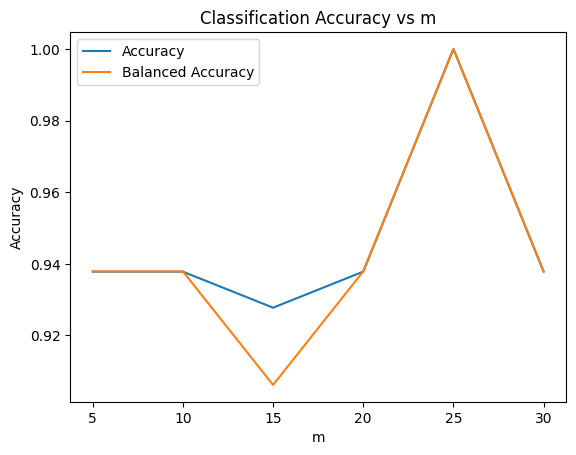

In [85]:
# Plot the accuracies for each m
#m = [5, 10, 15, 20, 25, 30]
plt.plot(mvals, macc[:], label='Accuracy')
plt.plot(mvals, mbal_acc[:], label='Balanced Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('m')
plt.legend(loc='best')
plt.title('Classification Accuracy vs m')
plt.show()

In [ ]:
# Save list of importantances to csv in Drive
import os
from google.colab import drive
drive.mount('drive')

gen_importances_df.to_csv('Gender_Importances.csv')
print(os.getcwd())


!cp Gender_Importances.csv "drive/My Drive/"